In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from utils import mnist_reader

# 1) Loading test and training dataset

In [2]:
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [3]:
X_test2 = X_test
X_train2 = X_train
y_test2 = y_test
y_train2 = y_train

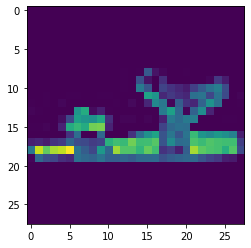

In [4]:
image = X_train[59999,:].reshape((28,28))
plt.imshow(image)

# 2) Train a Random Forest Classifier and time the training

In [5]:
rfc = RandomForestClassifier()

start = time.time()
rfc.fit(X_train, y_train)
end = time.time()
rfc_timer = end-start
print('Time spent on RFC standard --',end-start)
predict = rfc.predict(X_test)

C:\Users\Max\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Time spent on RFC standard -- 8.653167963027954


In [6]:
start = time.time()
predict = rfc.predict(X_test)
end = time.time()
print('Time spent after Prediction PCA  --',end-start)

Time spent after Prediction PCA  -- 0.0744314193725586


In [7]:
rfc.score(X_train,y_train)
print ("Train Standard RFC --", rfc.score(X_train,y_train))

Train Standard RFC -- 0.99575


In [8]:
test_resultrfc = rfc.score(X_test,y_test)
print ("Test Standard RFC --", rfc.score(X_test,y_test))

Test Standard RFC -- 0.854


In [9]:
acc = metrics.accuracy_score(predict,y_test)
print("Test accuracy_score --",acc)

Test accuracy_score -- 0.854


# Standard Scaller


In [10]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [11]:
start = time.time()
rfc.fit(X_train, y_train)
end = time.time()
print('Time spent after scaling with scallar --', end-start)
predict = rfc.predict(X_test)

Time spent after scaling with scallar -- 8.851228952407837


In [12]:
rfc.score(X_train,y_train)
print ("Train Standard Scallar --", rfc.score(X_train,y_train))
rfc.score(X_test,y_test)
print ("Test Standard Scallar --", rfc.score(X_test,y_test))

Train Standard Scallar -- 0.9953
Test Standard Scallar -- 0.8574


In [13]:
acc = metrics.accuracy_score(predict,y_test)
print("Test accuracy_score --",acc)

Test accuracy_score -- 0.8574


# 3 + 4) Pca Scaller and test time

In [14]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(X_train)
pca_train = pca.transform(X_train)
pca_test = pca.transform(X_test)

In [15]:
start = time.time()
rfc.fit(pca_train, y_train)
end = time.time()
PCA_timer = end-start
print('Time spent after PCA scaling --',end-start)
start = time.time()
predict = rfc.predict(pca_test)
end = time.time()
print('Time spent after Prediction PCA  --',end-start)

Time spent after PCA scaling -- 13.869829177856445
Time spent after Prediction PCA  -- 0.0438838005065918


In [16]:
rfc.score(pca_train,y_train)
print ("Train PCA Scallar --", rfc.score(pca_train,y_train))
PCA_testresult = rfc.score(pca_test,y_test)
print ("Test PCA Scallar --", rfc.score(pca_test,y_test))

Train PCA Scallar -- 0.9962833333333333
Test PCA Scallar -- 0.8131


In [17]:
acc = metrics.accuracy_score(predict,y_test)
print("Test accuracy_score --",acc)

Test accuracy_score -- 0.8131


# 5 + 6) Compare resultsing PCA/RFC

In [18]:
print('Score Rfc - ',test_resultrfc,'/Timer Rfc - ',rfc_timer)
print('Score PCA - ',PCA_testresult, '/Timer PCA - ',PCA_timer)

Score Rfc -  0.854 /Timer Rfc -  8.653167963027954
Score PCA -  0.8131 /Timer PCA -  13.869829177856445


The PCA accuracy score came out lower and slower than the RFC score

# 7 + 8) Softmax

In [19]:
start = time.time()
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
end = time.time()
predi = clf.predict_proba(X_test2) 
print('Softmax normal --', end-start)
CLF_timer = end-start

Softmax normal -- 14.866883754730225


C:\Users\Max\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [20]:
CLF_result = clf.score(X_test2,y_test2)

In [21]:
start = time.time()
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(pca_train, y_train)
end = time.time()
pred = clf.predict_proba(pca_test) 
print('Softmax PCA --', end-start)
PCA_timer = end-start

Softmax PCA -- 7.065080165863037


C:\Users\Max\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [22]:
CLFpca_testresult = clf.score(pca_test,y_test)

In [23]:
print('Score CLF - ',CLF_result,'/Timer Rfc - ',CLF_timer)
print('Score PCA - ',CLFpca_testresult, '/Timer PCA - ',PCA_timer)

Score CLF -  0.7419 /Timer Rfc -  14.866883754730225
Score PCA -  0.8445 /Timer PCA -  7.065080165863037


# 9) Conclusion?
PCA is more effective than softmax, it is quicker and has a better accuracy.

# Part 2 Viz
# 1-3

In [24]:
from sklearn.manifold import TSNE
RS = 123
x_subset = X_train[0:12500]
y_subset = y_train[0:12500]

In [25]:
start = time.time()
fashion_tsne = TSNE(n_components=2).fit_transform(x_subset)
end = time.time()
print("Time taken for t-sne", end-start)

Time taken for t-sne 435.8942189216614


In [26]:
len(fashion_tsne[0,:])

2

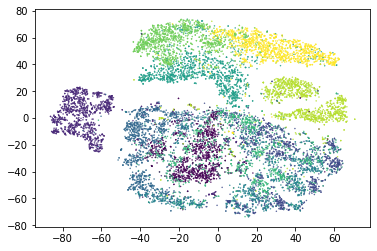

In [27]:
plt.scatter(fashion_tsne[:,0],fashion_tsne[:,1], c=y_subset,s=0.2)

Conclusion, items with similar labels are near each other.

# 4

In [28]:
df = pd.DataFrame(fashion_tsne,y_subset)

In [29]:
df = df.loc[[7,9,2]]

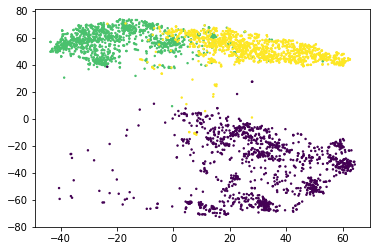

In [30]:
plt.scatter(df[0],df[1], c=df.index,s=2)

### Adding labels

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

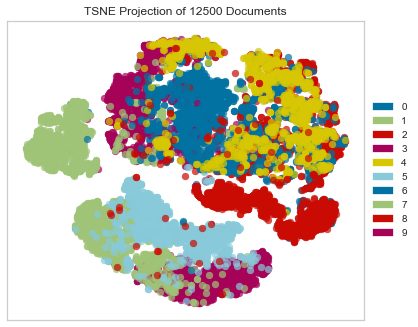

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(x_subset, y_subset)
tsne.show()